<a href="https://colab.research.google.com/github/adity1997/Fashion_MNIST_CNN/blob/main/Fashion_MNIST_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#For functional API not using sequintial but also we can try sequential so we can create both models, just getting hang at both the models syntax
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

In [3]:
#Loading Dataset
fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train,y_train), (x_test,y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [4]:
x_train, x_test = x_train/255.0 , x_test/255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [5]:
#Changing the dimensions of x_train and x_test as the model takes 3-D inputs
x_train = np.expand_dims(x_train,-1)
x_test = np.expand_dims(x_test,-1)
print(x_train.shape)

(60000, 28, 28, 1)


In [6]:
#No. feattures
K = len(set(y_train))
print(f"Number of Classes:{K}")

Number of Classes:10


In [7]:
#Models
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(x)
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dense(K, activation='softmax')(x)

model = Model(i, x)

In [8]:
#Compile and Fit
model.compile(optimizer='adam',loss='SparseCategoricalCrossentropy', metrics=['accuracy'])
r = model.fit(x_train, y_train,validation_data=(x_test,y_test), epochs = 15)

Epoch 1/15
1875/1875 [==============================] - 60s 31ms/step - loss: 0.5204 - accuracy: 0.8078 - val_loss: 0.3968 - val_accuracy: 0.8487
Epoch 2/15
1875/1875 [==============================] - 49s 26ms/step - loss: 0.3658 - accuracy: 0.8624 - val_loss: 0.3571 - val_accuracy: 0.8656
Epoch 3/15
1875/1875 [==============================] - 48s 25ms/step - loss: 0.3152 - accuracy: 0.8800 - val_loss: 0.3145 - val_accuracy: 0.8837
Epoch 4/15
1875/1875 [==============================] - 54s 29ms/step - loss: 0.2800 - accuracy: 0.8942 - val_loss: 0.3149 - val_accuracy: 0.8881
Epoch 5/15
1875/1875 [==============================] - 56s 30ms/step - loss: 0.2506 - accuracy: 0.9050 - val_loss: 0.3057 - val_accuracy: 0.8900
Epoch 6/15
1875/1875 [==============================] - 52s 28ms/step - loss: 0.2317 - accuracy: 0.9126 - val_loss: 0.3188 - val_accuracy: 0.8880
Epoch 7/15
1875/1875 [==============================] - 60s 32ms/step - loss: 0.2113 - accuracy: 0.9194 - val_loss: 0.3075 -

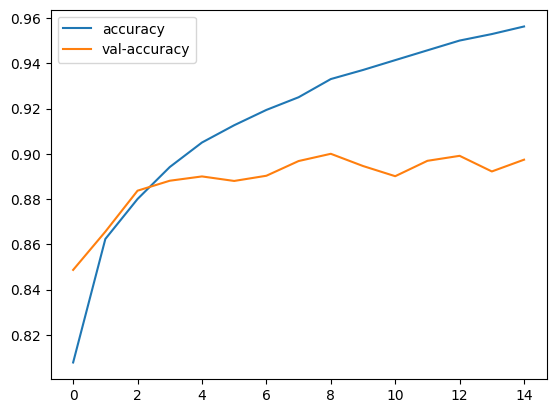

In [9]:
plt.plot(r.history['accuracy'], label='accuracy')
plt.plot(r.history['val_accuracy'], label='val-accuracy')
plt.legend()

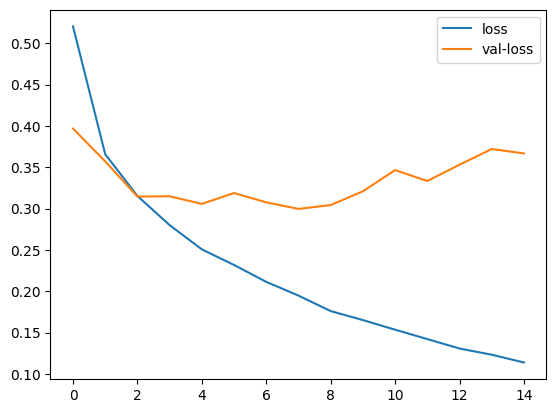

In [10]:
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val-loss')
plt.legend()

In [15]:
#Plotting Confusion Matrix
from sklearn.metrics import confusion_matrix
import itertools

313/313 [==============================] - 2s 8ms/step
Confusion Matrix, without normalization
[[871   0  18  13   5   1  90   0   2   0]
 [  2 977   2  11   3   1   3   0   1   0]
 [ 25   0 785  12  85   0  89   0   4   0]
 [ 15   8  14 906  30   0  26   0   1   0]
 [  0   1  36  26 867   0  67   0   3   0]
 [  1   0   0   0   0 979   0  12   1   7]
 [ 99   1  52  22 100   0 714   0  12   0]
 [  0   0   0   0   0  16   0 950   0  34]
 [  6   0   5   2   6   2   9   1 968   1]
 [  1   0   0   0   0   9   0  33   0 957]]


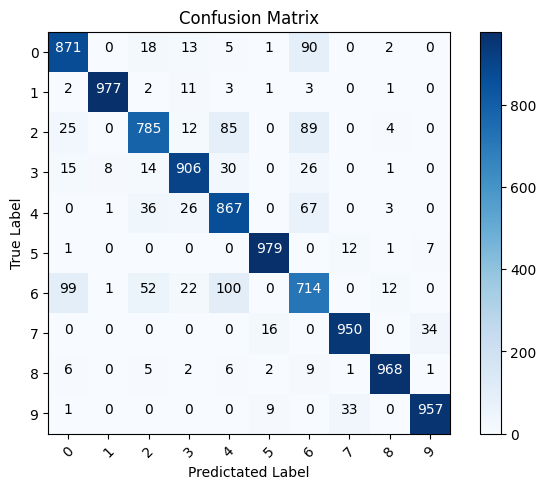

In [21]:
# Define a function that plots a confusion matrix
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Blues):
  
  # If normalize is True, normalize the confusion matrix and print a message indicating this
  if normalize:
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    print("Normalized Matrix")
  # Otherwise, print a message indicating that the confusion matrix is not normalized
  else:
    print("Confusion Matrix, without normalization")
  
  # Print the confusion matrix
  print(cm)
  
  # Create a plot of the confusion matrix using matplotlib
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  
  # Set the plot title
  plt.title(title)
  
  # Add a colorbar to the plot
  plt.colorbar()
  
  # Create a list of tick marks for the x and y axes
  tick_marks = np.arange(len(classes))
  
  # Set the x-axis tick labels to the class labels
  plt.xticks(tick_marks, classes, rotation=45)
  
  # Set the y-axis tick labels to the class labels
  plt.yticks(tick_marks, classes)

  # Set the format string for the text labels that will be added to the plot
  fmt = '.2f' if normalize else 'd'
  
  # Set a threshold for the text label colors
  thresh = cm.max() / 2.

  # Loop over each element in the confusion matrix and add a text label to the corresponding cell in the plot
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment='center',
             color='white' if cm[i, j] > thresh else "black")
  
  # Add spacing between subplots to prevent labels from overlapping
  plt.tight_layout()
  
  # Set the y-axis label to "True Label"
  plt.ylabel("True Label")
  
  # Set the x-axis label to "Predicted Label"
  plt.xlabel("Predicted Label")
  
  # Show the plot
  plt.show()

# Make predictions on the test data using a machine learning model, and compute the confusion matrix
p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)

# Plot the confusion matrix using the plot_confusion_matrix function
plot_confusion_matrix(cm, list(range(10)))

In [24]:
#Label mapping
labels = '''T-Shirt/Top
            Trouser
            PullOver
            Dress
            Coat
            Sandal
            Shirt
            Sneaker
            Bag
            Ankle boot'''.split()

Text(0.5, 1.0, 'True Label: Coat Predicted: Shirt')

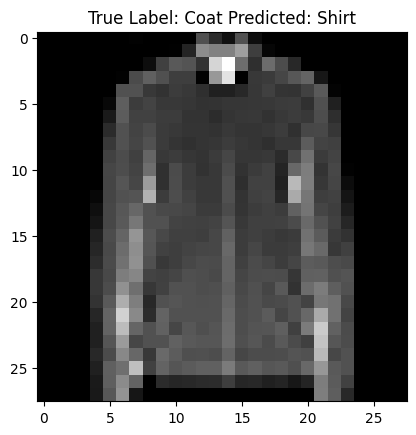

In [26]:
#Showing Misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True Label: %s Predicted: %s" % (labels[y_test[i]],labels[p_test[i]]))